In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Prompt: from typing import List


def has_close_elements(numbers: List[float], threshold: float) -> bool:
    """ Check if in given list of numbers, are any two numbers closer to each other than
    given threshold.
    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)
    False
    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)
    True
    """

Expected Output:     for idx, elem in enumerate(numbers):
        for idx2, elem2 in enumerate(numbers):
            if idx != idx2:
                distance = abs(elem - elem2)
                if distance < threshold:
                    return True

    return False

Generated Output: from typing import List


def has_close_elements(numbers: List[float], threshold: float) -> bool:
    """ Check if in given list of numbers, are any two numbers closer to each other than
    given threshold.
    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)
    False
    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)
    True
    """

def ha

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Prompt: from typing import List


def separate_paren_groups(paren_string: str) -> List[str]:
    """ Input to this function is a string containing multiple groups of nested parentheses. Your goal is to
    separate those group into separate strings and return the list of those.
    Separate groups are balanced (each open brace is properly closed) and not nested within each other
    Ignore any spaces in the input string.
    >>> separate_paren_groups('( ) (( )) (( )( ))')
    ['()', '(())', '(()())']
    """

Expected Output:     result = []
    current_string = []
    current_depth = 0

    for c in paren_string:
        if c == '(':
            current_depth += 1
            current_string.append(c)
        elif c == ')':
            current_depth -= 1
            current_string.append(c)

            if current_depth == 0:
                result.append(''.join(current_string))
                current_string.clear()

    return result

Generated Output: from typing import List


def 

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Prompt: 

def truncate_number(number: float) -> float:
    """ Given a positive floating point number, it can be decomposed into
    and integer part (largest integer smaller than given number) and decimals
    (leftover part always smaller than 1).

    Return the decimal part of the number.
    >>> truncate_number(3.5)
    0.5
    """

Expected Output:     return number % 1.0

Generated Output: 

def truncate_number(number: float) -> float:
    """ Given a positive floating point number, it can be decomposed into
    and integer part (largest integer smaller than given number) and decimals
    (leftover part always smaller than 1).

    Return the decimal part of the number.
    >>> truncate_number(3.5)
    0.5
    """

def truncate_number(number: float) -> float:
    """ Given a positive floating point number, it can be decomposed into
    and integer part (largest integer smaller than given number) and decimals
    (leftover part always smaller than 1).

    Return the decimal part

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Prompt: from typing import List


def below_zero(operations: List[int]) -> bool:
    """ You're given a list of deposit and withdrawal operations on a bank account that starts with
    zero balance. Your task is to detect if at any point the balance of account fallls below zero, and
    at that point function should return True. Otherwise it should return False.
    >>> below_zero([1, 2, 3])
    False
    >>> below_zero([1, 2, -4, 5])
    True
    """

Expected Output:     balance = 0

    for op in operations:
        balance += op
        if balance < 0:
            return True

    return False

Generated Output: from typing import List


def below_zero(operations: List[int]) -> bool:
    """ You're given a list of deposit and withdrawal operations on a bank account that starts with
    zero balance. Your task is to detect if at any point the balance of account fallls below zero, and
    at that point function should return True. Otherwise it should return False.
    >>> below_zero(

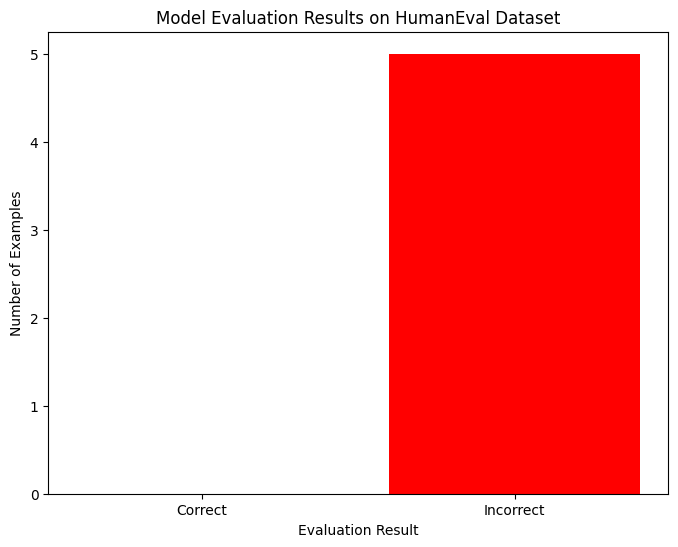

In [ ]:
# Import necessary libraries
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset
import torch
import matplotlib.pyplot as plt

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("bigcode/starcoder2-3b")
model = AutoModelForCausalLM.from_pretrained("bigcode/starcoder2-3b")

# Load the HumanEval dataset
humaneval_dataset = load_dataset("openai_humaneval")

# Function to generate code completions
def generate_completion(prompt, max_length=1000, temperature=0.7):
    inputs = tokenizer(prompt, return_tensors="pt")
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    with torch.no_grad():
        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask,
                                 max_length=max_length, temperature=temperature)

    completion = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return completion

# Function to evaluate the model
def evaluate_model(dataset, num_examples=5):
    correct = 0
    results = []
    for i, example in enumerate(dataset["test"]):
        if i >= num_examples:
            break

        prompt = example["prompt"]
        expected_output = example["canonical_solution"]

        generated_output = generate_completion(prompt)

        print(f"Prompt: {prompt}")
        print(f"Expected Output: {expected_output}")
        print(f"Generated Output: {generated_output}")
        print("----------------------------------------------------")

        # Check if the expected output is in the generated output
        is_correct = expected_output in generated_output
        results.append(is_correct)
        if is_correct:
            correct += 1

    accuracy = correct / num_examples
    print(f"Accuracy: {accuracy * 100}%")

    return results

# Function to plot the evaluation results
def plot_results(results):
    labels = ['Correct', 'Incorrect']
    counts = [sum(results), len(results) - sum(results)]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=['green', 'red'])
    plt.xlabel('Evaluation Result')
    plt.ylabel('Number of Examples')
    plt.title('Model Evaluation Results on HumanEval Dataset')
    plt.show()

# Evaluate the model on the HumanEval dataset and plot the results
results = evaluate_model(humaneval_dataset)
plot_results(results)
